In [1]:
!pip install pandas numpy matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 1.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.9/101.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 11.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 8.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 8.6 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 7.3 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 9.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 9.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 9.0 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.8/346.8 

In [2]:
# load data

encoding_data = pd.read_csv('encoding_draco/benchmark_local_xavier.csv')

#print(encoding_data.head())

qp_vals = [4, 8, 12, 16, 20, 24, 32]

# data has this header qp, cl, encoding_time(ms), original_size(bytes), encoded_size(bytes)
# assign names to columns

encoding_data.columns = ['qp', 'cl', 'encoding_time', 'original_size', 'encoded_size', 'decoding_time']
encoding_data['encoding_time']/=1000
encoding_data['decoding_time']/=1000
# add compression ratio column
encoding_data['compression_ratio'] =  100*(1-encoding_data['encoded_size'] / encoding_data['original_size'])

# add total time column
encoding_data['total_time'] = encoding_data['encoding_time'] + encoding_data['decoding_time']

# find qp and cl value that gives the best compression ratio
best_cr = encoding_data.loc[encoding_data['compression_ratio'].idxmax()]
print("best compression ratio parameters")
print(best_cr['qp'], best_cr['cl'], best_cr['compression_ratio'], best_cr['total_time'])

# find qp and cl value that gives the best total time
best_time = encoding_data.loc[encoding_data['total_time'].idxmin()]
print("best time parameters")
print(best_time['qp'], best_time['cl'], best_time['compression_ratio'], best_time['total_time'])

# min decoding time
min_decoding_time = encoding_data['decoding_time'].min()
print("min decoding time")
print(min_decoding_time)

# min encoding time
min_encoding_time = encoding_data['encoding_time'].min()
print("min encoding time")
print(min_encoding_time)
encoding_data['qp'].mask(encoding_data['qp'] == 0, 32, inplace=True)

encoding_data  = encoding_data[encoding_data['qp'].isin(qp_vals)]

display(encoding_data)

best compression ratio parameters
1.0 6.0 99.87575543676806 0.626
best time parameters
0.0 8.0 68.08849262904755 0.254
min decoding time
0.106
min encoding time
0.146


/tmp/ipykernel_104/1107376188.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  encoding_data['qp'].mask(encoding_data['qp'] == 0, 32, inplace=True)


,qp,cl,encoding_time,original_size,encoded_size,decoding_time,compression_ratio,total_time
0,32,0,0.168,32524562,10379078,0.112,68.088493,0.280
1,32,1,0.146,32524562,10379078,0.113,68.088493,0.259
2,32,2,0.160,32524562,10379078,0.110,68.088493,0.270
3,32,3,0.163,32524562,10379078,0.108,68.088493,0.271
4,32,4,0.160,32524562,10379078,0.106,68.088493,0.266
...,...,...,...,...,...,...,...,...
270,24,6,1.313,32524562,5390321,0.315,83.426922,1.628
271,24,7,1.308,32524562,5390321,0.312,83.426922,1.620
272,24,8,1.319,32524562,5390321,0.309,83.426922,1.628
273,24,9,1.319,32524562,5390321,0.311,83.426922,1.630


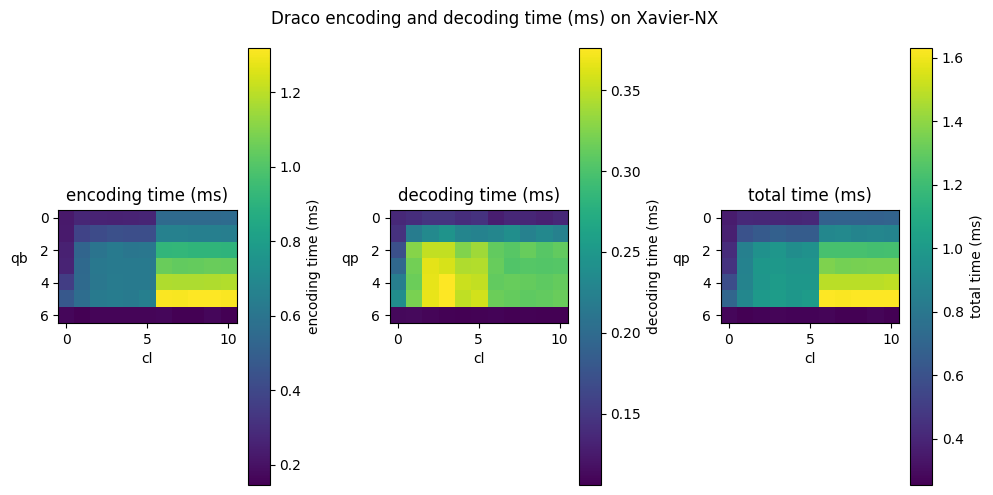

In [3]:


# plot encoding time vs (qp, cl) like an heatmap in a sub plot 
plt.figure(figsize=(10, 5))

# figure title

plt.suptitle('Draco encoding and decoding time (ms) on Xavier-NX')

plt.subplot(1, 3, 1)

# create a pivot table
encoding_time_pivot = encoding_data.pivot_table(index='qp', columns='cl', values='encoding_time')


plt.xlabel('cl')

# put vertical label rotated with padding
plt.ylabel('qb', rotation=0, labelpad=15)


# plot the pivot table color map viridis
plt.imshow(encoding_time_pivot, cmap='viridis', interpolation='nearest')
# label the color bar
plt.colorbar().set_label('encoding time (ms)')

plt.title('encoding time (ms)')

# plot decoding time vs (qp, cl) like an heatmap in a sub plot

plt.subplot(1, 3, 2)

# create a pivot table
decoding_time_pivot = encoding_data.pivot_table(index='qp', columns='cl', values='decoding_time')

plt.xlabel('cl')

# put vertical label rotated with padding
plt.ylabel('qp', rotation=0, labelpad=15)

# plot the pivot table color map viridis
plt.imshow(decoding_time_pivot, cmap='viridis', interpolation='nearest')
# label the color bar
plt.colorbar().set_label('decoding time (ms)')
plt.title('decoding time (ms)')

# plot sum of encoding and decoding time vs (qp, cl) like an heatmap in a sub plot

plt.subplot(1, 3, 3)

# create a pivot table

total_time_pivot = encoding_time_pivot + decoding_time_pivot

plt.xlabel('cl')

# put vertical label rotated with padding100*
plt.ylabel('qp', rotation=0, labelpad=15)

# plot the pivot table color map viridis
plt.imshow(total_time_pivot, cmap='viridis', interpolation='nearest')

plt.colorbar().set_label('total time (ms)')
plt.title('total time (ms)')

plt.tight_layout()

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'berlin', 'managua', 'vanimo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 't

Text(0.5, 1.0, 'compression ratio (%) on Xavier-NX')

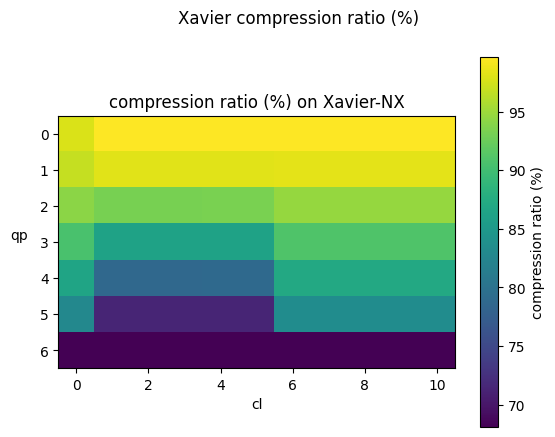

In [4]:
# plot compression ratio vs (qp, cl) like an heatmap

# create a pivot table
compression_ratio_pivot = encoding_data.pivot_table(index='qp', columns='cl', values='compression_ratio')

plt.figure()

plt.suptitle('Xavier compression ratio (%)')

plt.xlabel('cl')

# put vertical label rotated with padding
plt.ylabel('qp', rotation=0, labelpad=15)

# plot the pivot table color map viridis reversed
plt.imshow(compression_ratio_pivot, cmap='viridis', interpolation='nearest')


# label the color bar
plt.colorbar().set_label('compression ratio (%)')


# list all available colormaps
print(plt.colormaps())
plt.title('compression ratio (%) on Xavier-NX')



In [5]:
!pip install seaborn
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 3.8 MB/s eta 0:00:00a 0:00:01


/tmp/ipykernel_104/2442837014.py:3: UserWarning: The palette list has more values (20) than needed (11), which may not be intended.
  g = sns.lineplot(data=encoding_data, x='qp', y='encoding_time', hue='cl',palette=palette, markers=True, style='cl',dashes=False)


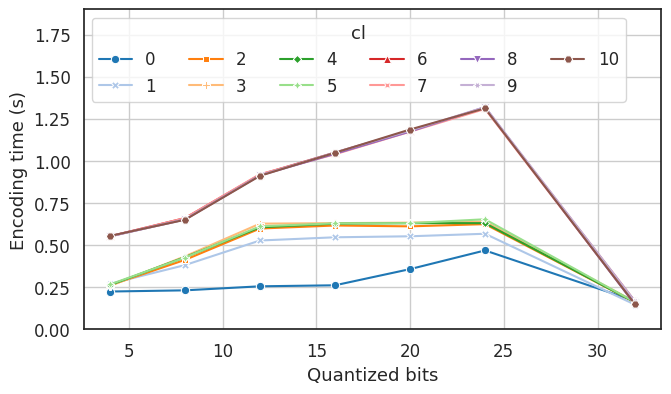

In [6]:
palette = sns.color_palette("tab20")
sns.set_theme(style="white", palette=palette,rc={'figure.figsize':(7,4)}, font_scale=1.09)
g = sns.lineplot(data=encoding_data, x='qp', y='encoding_time', hue='cl',palette=palette, markers=True, style='cl',dashes=False)
g.set_ylabel('Encoding time (s)')
g.set_xlabel('Quantized bits')
g.set_ylim([0, 1.9])
g.legend(loc='upper left',ncol=6, title="cl")
g.grid(which='both')
plt.subplots_adjust(bottom=0.15, top=0.95,right=0.95)

plt.savefig('encoding_time.pdf')

/tmp/ipykernel_104/3628101117.py:5: UserWarning: The palette list has more values (20) than needed (11), which may not be intended.
  g = sns.lineplot(data=encoding_data, x='qp', y='decoding_time', hue='cl',palette=palette, markers=True,


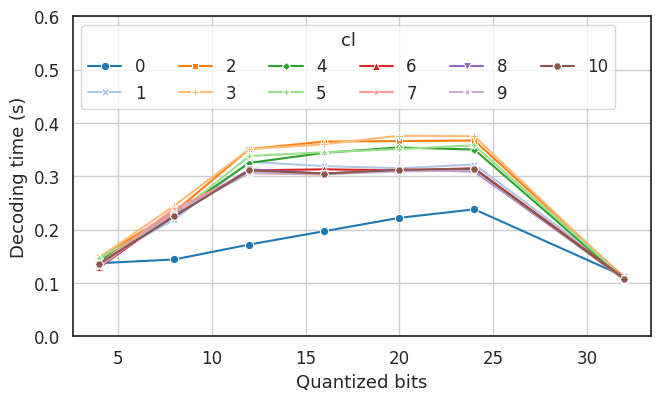

In [7]:
palette = sns.color_palette("tab20")

sns.set_theme(style="white", palette=palette,rc={'figure.figsize':(7,4)}, font_scale=1.09)

g = sns.lineplot(data=encoding_data, x='qp', y='decoding_time', hue='cl',palette=palette, markers=True,
                 style='cl',dashes=False)
#g.set_yscale("log")
g.set_ylabel('Decoding time (s)')
g.legend(loc='upper left',ncol=6, title="cl")
g.set_xlabel('Quantized bits')
g.grid(which='both')
g.set_ylim([0.000, 0.6])
plt.subplots_adjust(bottom=0.15, top=0.95,right=0.95)

plt.savefig('decoding_time.pdf')


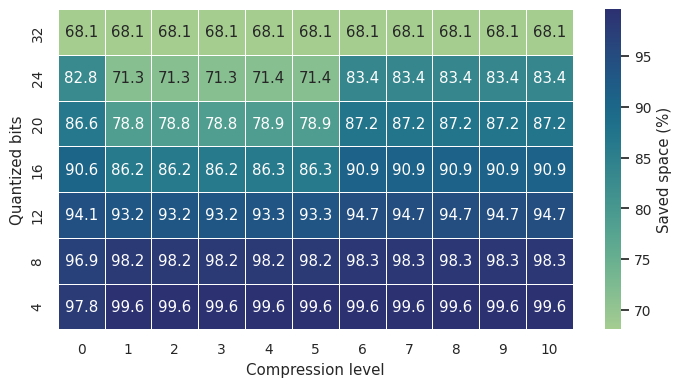

In [8]:
sns.set_theme(style="white", palette=palette,rc={'figure.figsize':(7,4)}, font_scale=0.9)
g = sns.heatmap(compression_ratio_pivot,annot=True, fmt=".1f", cmap="crest", linewidths=0.5,
               cbar_kws={'label': 'Saved space (%)'})
g.invert_yaxis()

g.set_ylabel('Quantized bits')
g.set_xlabel('Compression level')

plt.subplots_adjust(bottom=0.15, top=0.95,right=1.02,left=0.1)

plt.savefig('saved_space.pdf')
